# Stock Market Prediction And Forecasting Using Stacked LSTM

Name: Rutuja Yogesh Mahajan


Level: Beginner


Task: 02


College: MIT Academy of Engineering, Pune

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

# Import Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv", parse_dates=True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Exploratory Data Analysis

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [5]:
df.shape

(2035, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

# Data Visualization

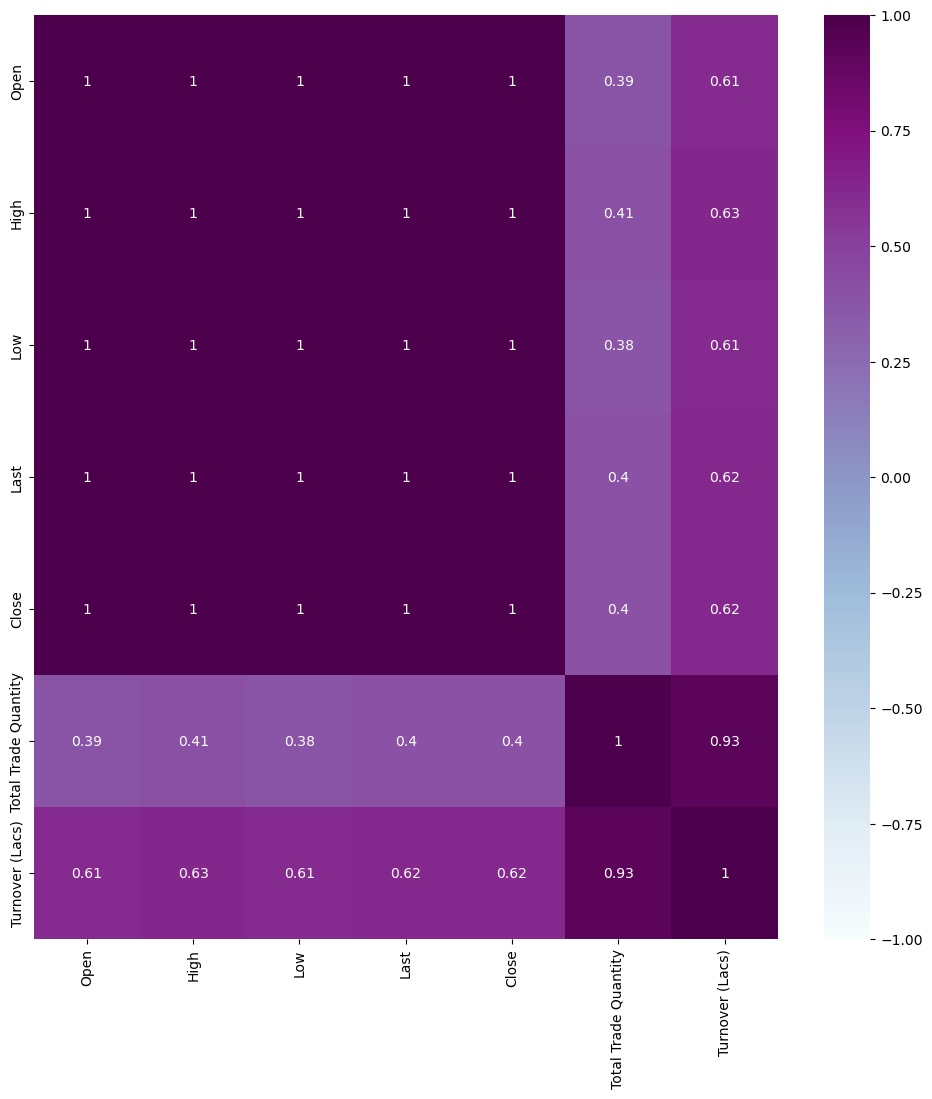

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True,cmap="BuPu", ax=ax)
plt.show()

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Last'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Total Trade Quantity'}>],
       [<AxesSubplot:title={'center':'Turnover (Lacs)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

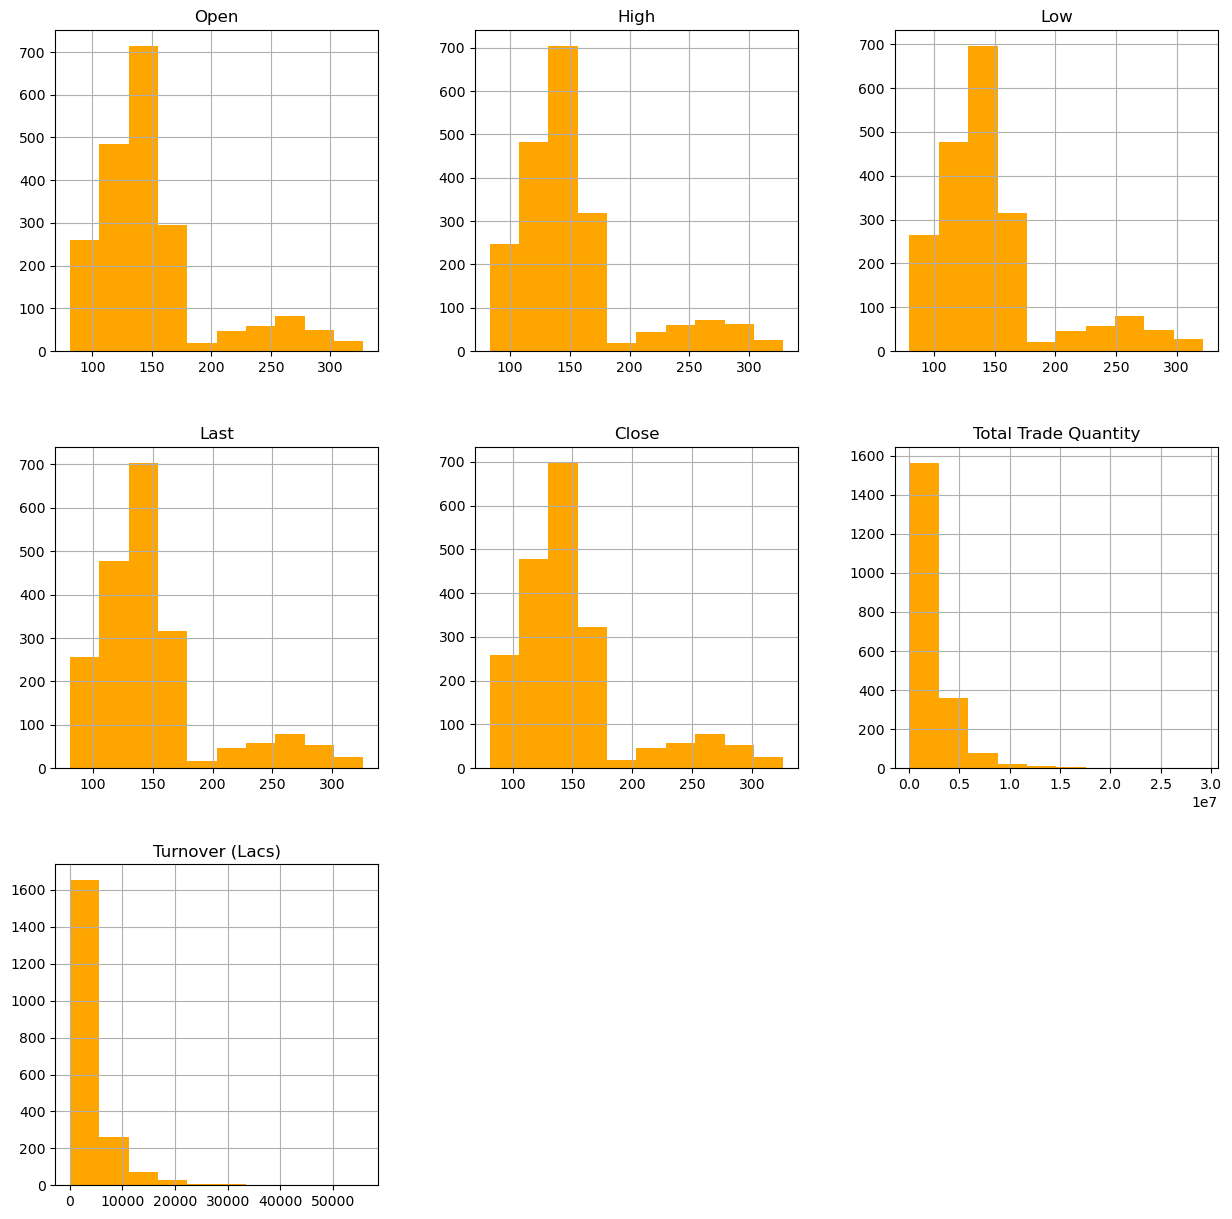

In [11]:
df.hist(figsize = (15,15),grid=True, color='orange')

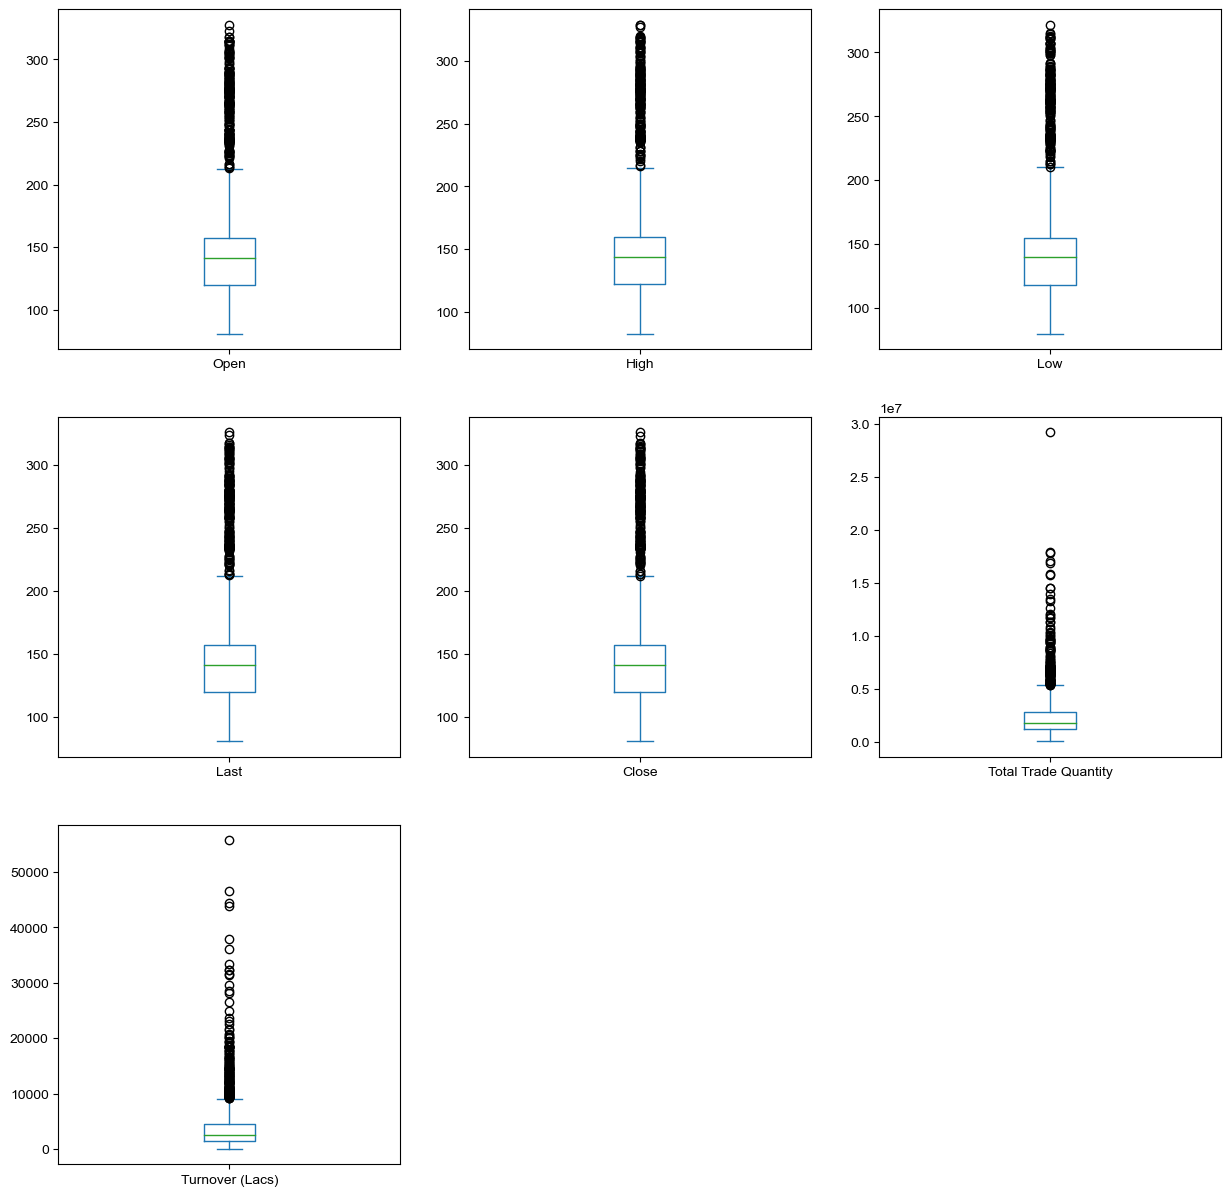

In [12]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

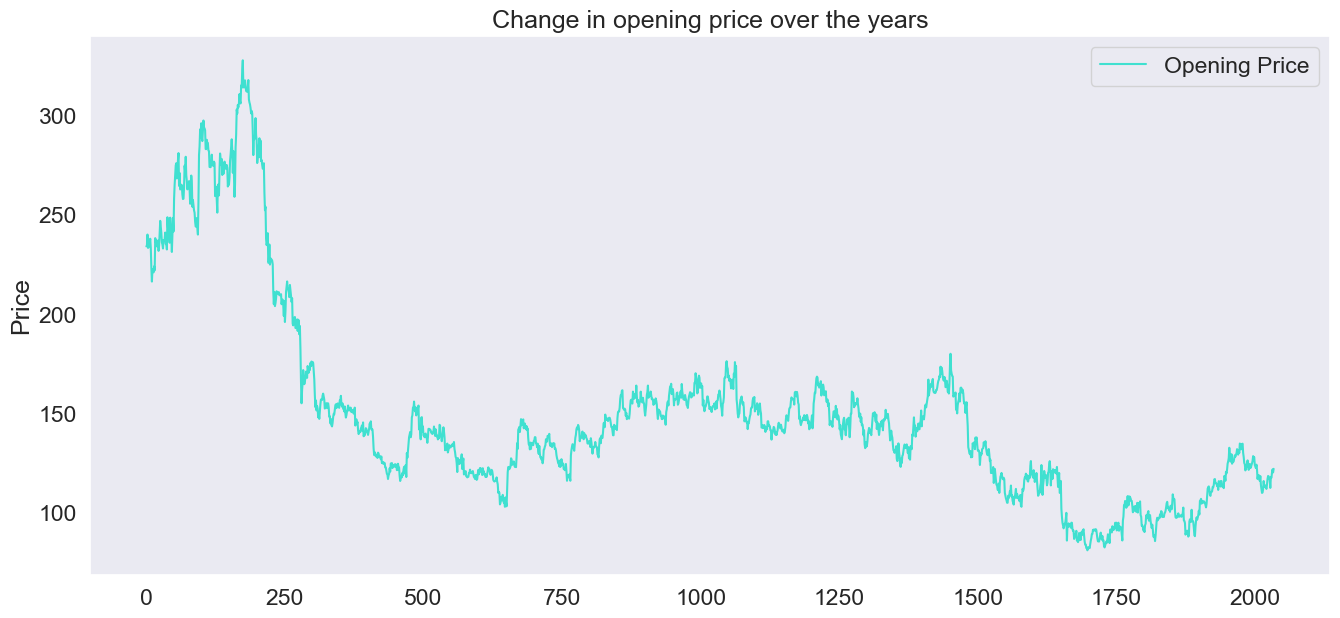

In [13]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(16,7),color='turquoise',label="Opening Price")

plt.ylabel("Price")
plt.legend()
plt.title("Change in opening price over the years")
plt.grid()

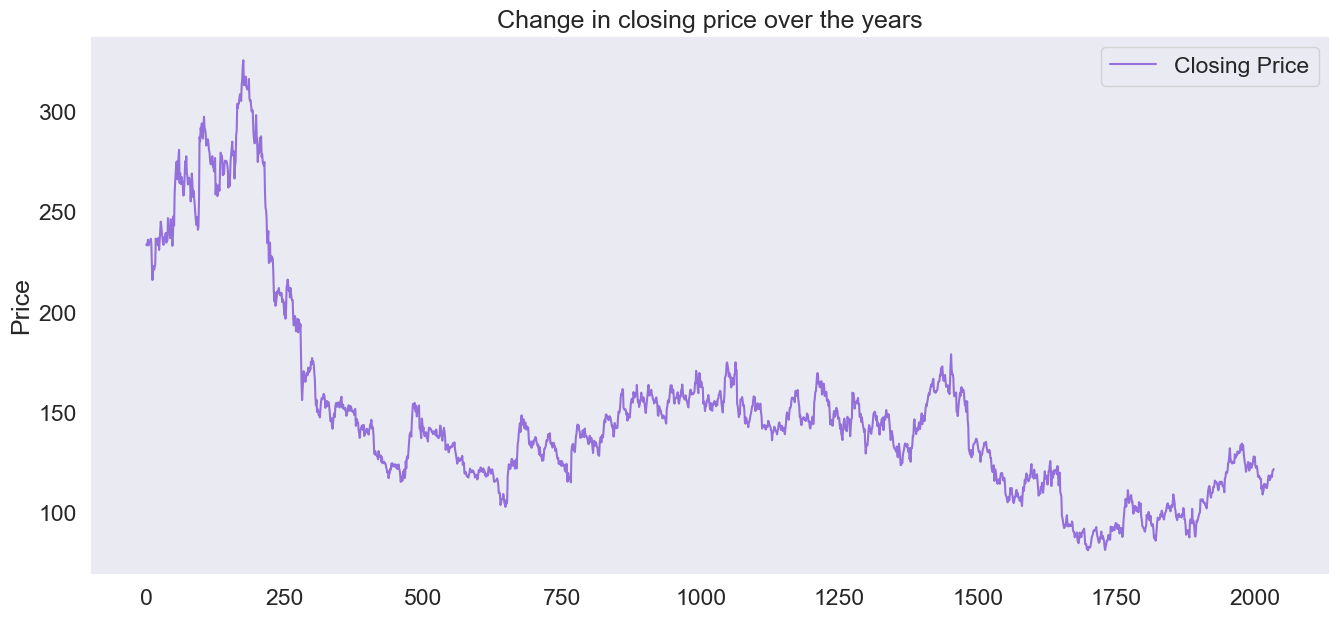

In [14]:
plt.figure(figsize=(10,6))
df['Close'].plot(kind='line',figsize=(16,7),color='mediumpurple',label="Closing Price")

plt.ylabel("Price")
plt.legend()
plt.title("Change in closing price over the years")
plt.grid()

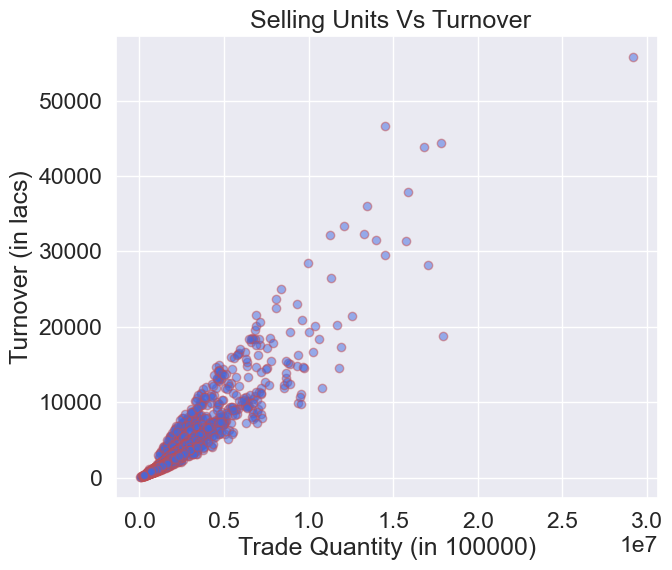

In [15]:
fig=plt.figure(figsize=(7,6))
plt.scatter(df['Total Trade Quantity'],df['Turnover (Lacs)'], alpha=0.5, edgecolor='r', color='royalblue')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")
plt.show()

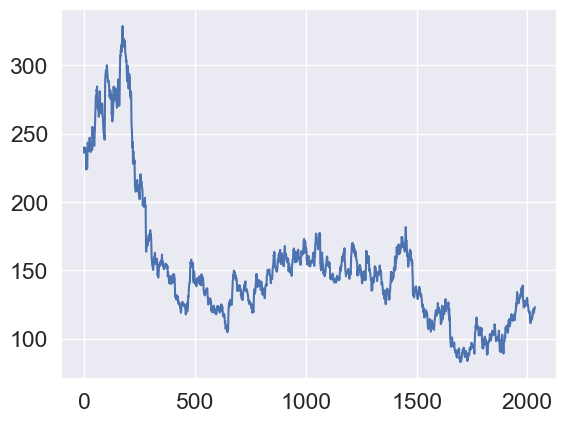

In [16]:
df_high=df.reset_index()['High']
plt.plot(df_high)

In [17]:
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [18]:
df_high.shape

(2035, 1)

# Data Splitting

In [19]:
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data,test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [20]:
training_size, test_size

(1526, 509)

In [21]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [23]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1425, 100, 1)
(1425,)
(408, 100, 1)
(408,)


# Stacked LSTM Model

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 12s 318ms/step - loss: 0.0259 - val_loss: 0.0053
Epoch 2/100
23/23 [==============================] - 6s 256ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 6s 271ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 6s 243ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 6s 246ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/100
23/23 [==============================] - 6s 238ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/100
23/23 [==============================] - 6s 259ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/100
23/23 [==============================] - 5s 238ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 6s 243ms/step - loss: 9.9547e-04 - val_loss: 0.0014
Epoch 10/100
23/23 [==============================] - 6s 245ms/step - loss: 0.0011 - v

In [27]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

13/13 [==============================] - 0s 23ms/step


In [28]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [29]:
math.sqrt(mean_squared_error(y_train, train_predict))

77.32763296579823

In [30]:
math.sqrt(mean_squared_error(y_test, test_predict))

81.19967717718339

# Plotting

In [31]:
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

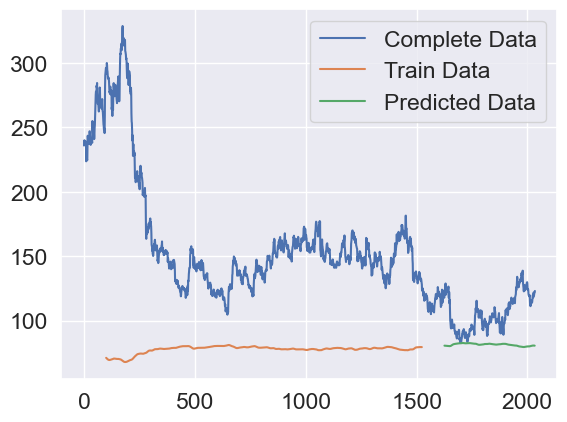

In [32]:
# plot Predictions
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Complete Data', 'Train Data', 'Predicted Data'])
plt.show()

In [33]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [34]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[-0.00947519]
101
1 day input [ 0.13254727  0.13397032  0.13356373  0.13498679  0.14108559  0.13498679
  0.12644847  0.12685505  0.12482212  0.14515145  0.1467778   0.15003049
  0.15368977  0.17198618  0.16548079  0.17625534  0.17564546  0.19129904
  0.20817239  0.20309006  0.18479366  0.17930474  0.1896727   0.17483228
  0.17849156  0.17645863  0.18540354  0.18377719  0.19190892  0.18987599
  0.19028258  0.19394186  0.20004066  0.19638138  0.19495832  0.20349665
  0.19597479  0.21162838  0.22036999  0.20979874  0.21528766  0.21589754
  0.21610083  0.22748526  0.19150234  0.1833706   0.17340923  0.16751372
  0.1622281   0.17056312  0.17462899  0.17930474  0.18174426  0.16853019
  0.16548079  0.1742224   0.1713763   0.17300264  0.17157959  0.17767839
  0.18459036  0.18702988  0.18987599  0.19109575  0.18581012  0.17015654
  0.16751372  0.16974995  0.16609067  0.15531612  0.15003049  0.15064037
  0.14860744  0.14596463  0.15043708  0.14413499  0.12441553  0.12827811
  0.11547062  0.12034

8 day output [[-0.00588094]]
9 day input [ 0.12482212  0.14515145  0.1467778   0.15003049  0.15368977  0.17198618
  0.16548079  0.17625534  0.17564546  0.19129904  0.20817239  0.20309006
  0.18479366  0.17930474  0.1896727   0.17483228  0.17849156  0.17645863
  0.18540354  0.18377719  0.19190892  0.18987599  0.19028258  0.19394186
  0.20004066  0.19638138  0.19495832  0.20349665  0.19597479  0.21162838
  0.22036999  0.20979874  0.21528766  0.21589754  0.21610083  0.22748526
  0.19150234  0.1833706   0.17340923  0.16751372  0.1622281   0.17056312
  0.17462899  0.17930474  0.18174426  0.16853019  0.16548079  0.1742224
  0.1713763   0.17300264  0.17157959  0.17767839  0.18459036  0.18702988
  0.18987599  0.19109575  0.18581012  0.17015654  0.16751372  0.16974995
  0.16609067  0.15531612  0.15003049  0.15064037  0.14860744  0.14596463
  0.15043708  0.14413499  0.12441553  0.12827811  0.11547062  0.12034966
  0.13478349  0.13498679  0.12868469  0.13295385  0.12807481  0.12624517
  0.1305143

16 day output [[-0.00122667]]
17 day input [ 0.17564546  0.19129904  0.20817239  0.20309006  0.18479366  0.17930474
  0.1896727   0.17483228  0.17849156  0.17645863  0.18540354  0.18377719
  0.19190892  0.18987599  0.19028258  0.19394186  0.20004066  0.19638138
  0.19495832  0.20349665  0.19597479  0.21162838  0.22036999  0.20979874
  0.21528766  0.21589754  0.21610083  0.22748526  0.19150234  0.1833706
  0.17340923  0.16751372  0.1622281   0.17056312  0.17462899  0.17930474
  0.18174426  0.16853019  0.16548079  0.1742224   0.1713763   0.17300264
  0.17157959  0.17767839  0.18459036  0.18702988  0.18987599  0.19109575
  0.18581012  0.17015654  0.16751372  0.16974995  0.16609067  0.15531612
  0.15003049  0.15064037  0.14860744  0.14596463  0.15043708  0.14413499
  0.12441553  0.12827811  0.11547062  0.12034966  0.13478349  0.13498679
  0.12868469  0.13295385  0.12807481  0.12624517  0.13051433  0.13905265
  0.14718439  0.15104696  0.14515145  0.14311852  0.15816223  0.15328319
  0.14921

24 day output [[9.813593e-06]]
25 day input [ 1.78491563e-01  1.76458630e-01  1.85403537e-01  1.83777190e-01
  1.91908925e-01  1.89875991e-01  1.90282578e-01  1.93941858e-01
  2.00040659e-01  1.96381378e-01  1.94958325e-01  2.03496646e-01
  1.95974792e-01  2.11628380e-01  2.20369994e-01  2.09798740e-01
  2.15287660e-01  2.15897540e-01  2.16100834e-01  2.27485261e-01
  1.91502338e-01  1.83370604e-01  1.73409230e-01  1.67513722e-01
  1.62228095e-01  1.70563123e-01  1.74628990e-01  1.79304737e-01
  1.81744257e-01  1.68530189e-01  1.65480789e-01  1.74222403e-01
  1.71376296e-01  1.73002643e-01  1.71579589e-01  1.77678390e-01
  1.84590364e-01  1.87029884e-01  1.89875991e-01  1.91095751e-01
  1.85810124e-01  1.70156536e-01  1.67513722e-01  1.69749949e-01
  1.66090669e-01  1.55316121e-01  1.50030494e-01  1.50640374e-01
  1.48607441e-01  1.45964627e-01  1.50437081e-01  1.44134987e-01
  1.24415532e-01  1.28278105e-01  1.15470624e-01  1.20349665e-01
  1.34783493e-01  1.34986786e-01  1.28684692e-

In [36]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [37]:
day_new.shape

(100,)

In [38]:
day_pred.shape

(28,)

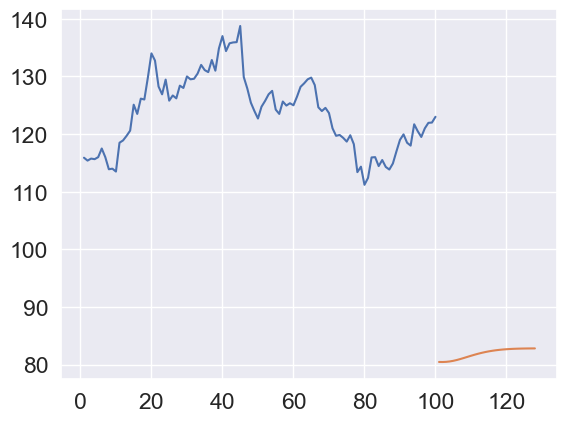

In [39]:
plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

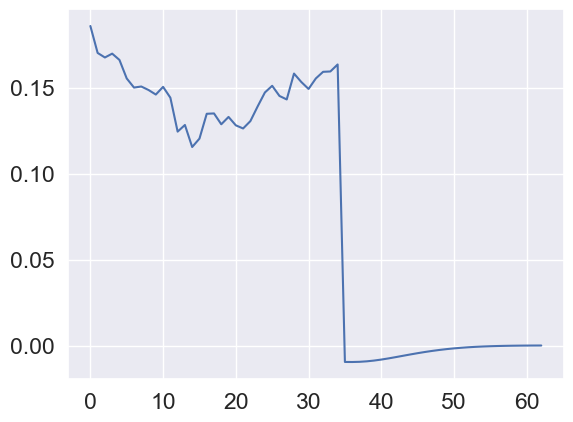

In [40]:
data_new = df_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

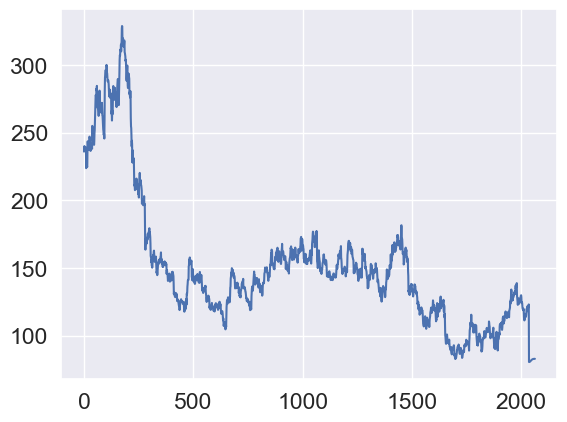

In [41]:
data_new =scaler.inverse_transform(data_new).tolist()
plt.plot(data_new)

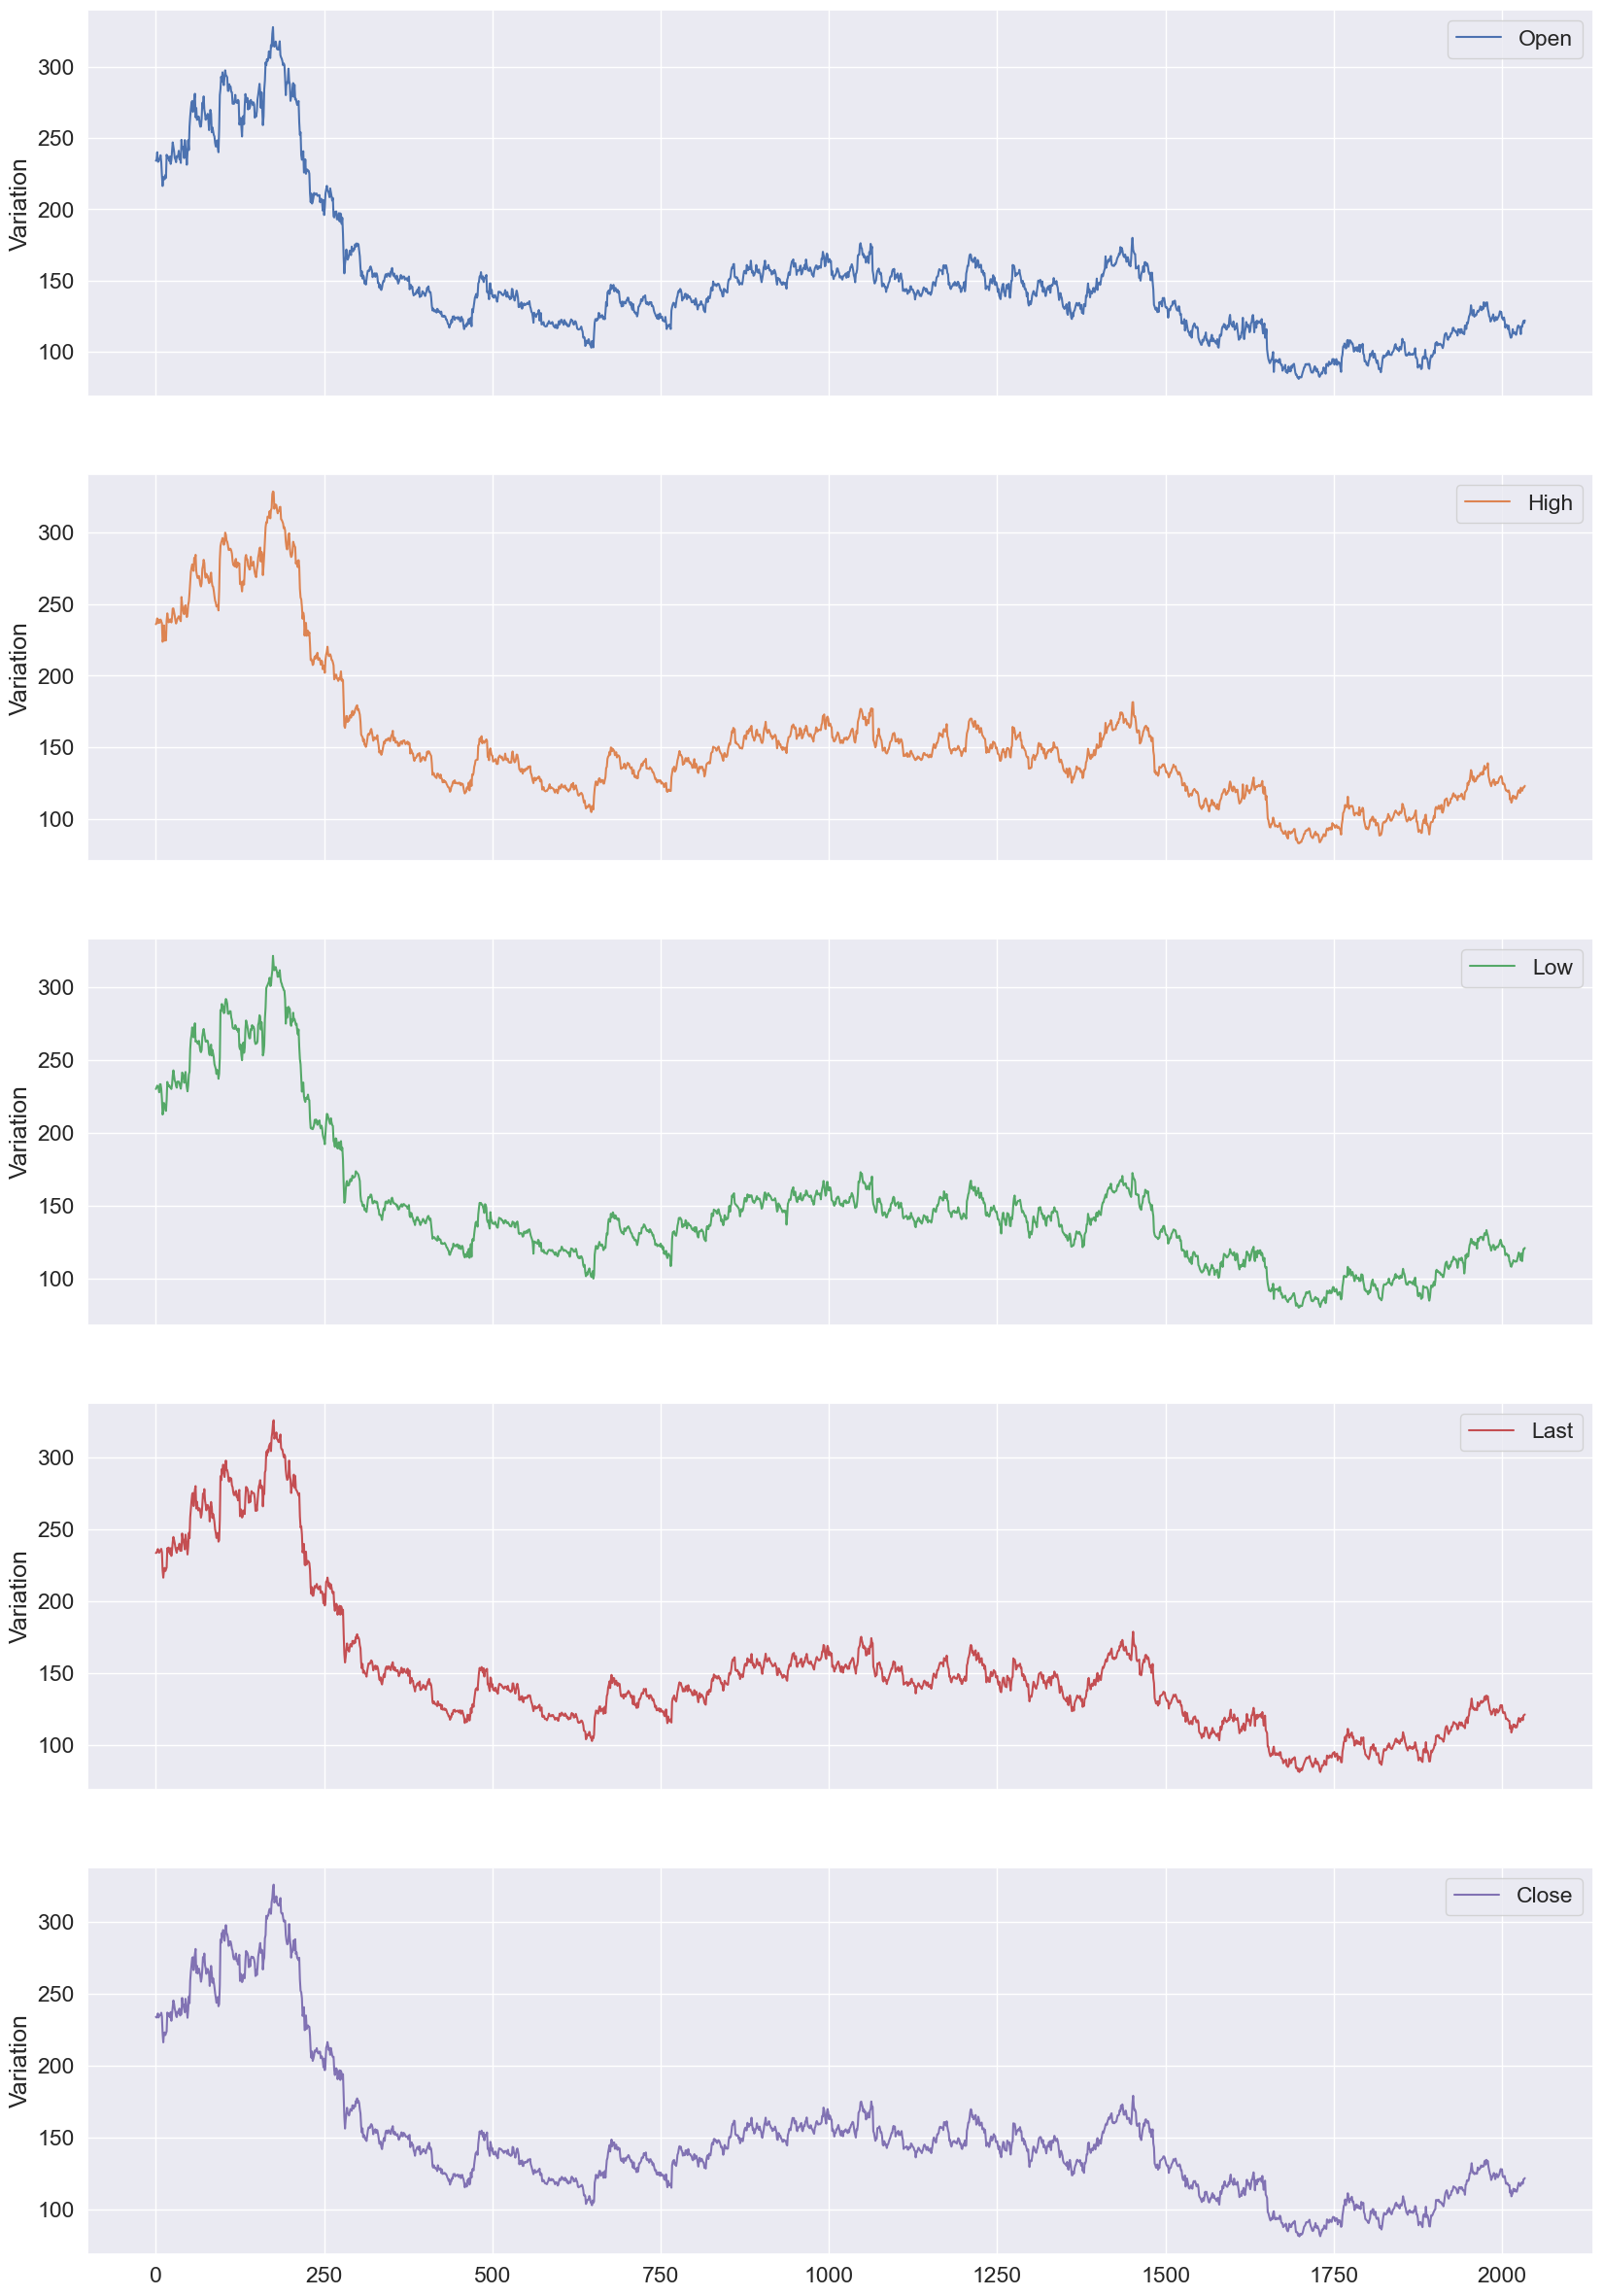

In [42]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')